In [18]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
#sns.set(style="darkgrid")
sns.set_style("white")

/private/home/maksymets/.conda/envs/my_fair_env/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


         collisions.count  distance_to_goal  reward  softspl     spl  split  \
step_id               NaN               NaN     NaN      NaN     NaN  train   
step_id               NaN               NaN     NaN      NaN     NaN  train   
step_id               NaN               NaN     NaN      NaN     NaN  train   
step_id               NaN               NaN     NaN      NaN     NaN  train   
step_id               NaN               NaN     NaN      NaN     NaN  train   
...                   ...               ...     ...      ...     ...    ...   
step_id            7.4859            0.1928  7.1047   0.7483  0.7734    val   
step_id            8.5845            0.1881  7.1083   0.7496  0.7768    val   
step_id            8.5181            0.2745  7.0016   0.7528  0.7783    val   
step_id            7.4074            0.1478  7.1920   0.7601  0.7875    val   
step_id            7.5624            0.1782  7.1162   0.7549  0.7799    val   

              step_id  success  train_Average windo

/private/home/maksymets/.conda/envs/my_fair_env/lib/python3.7/site-packages/seaborn/relational.py:1651: UserWarning: relplot is a figure-level function and does not accept target axes. You may wish to try lineplot
  warnings.warn(msg, UserWarning)


AttributeError: 'FacetGrid' object has no attribute 'tight_layout'

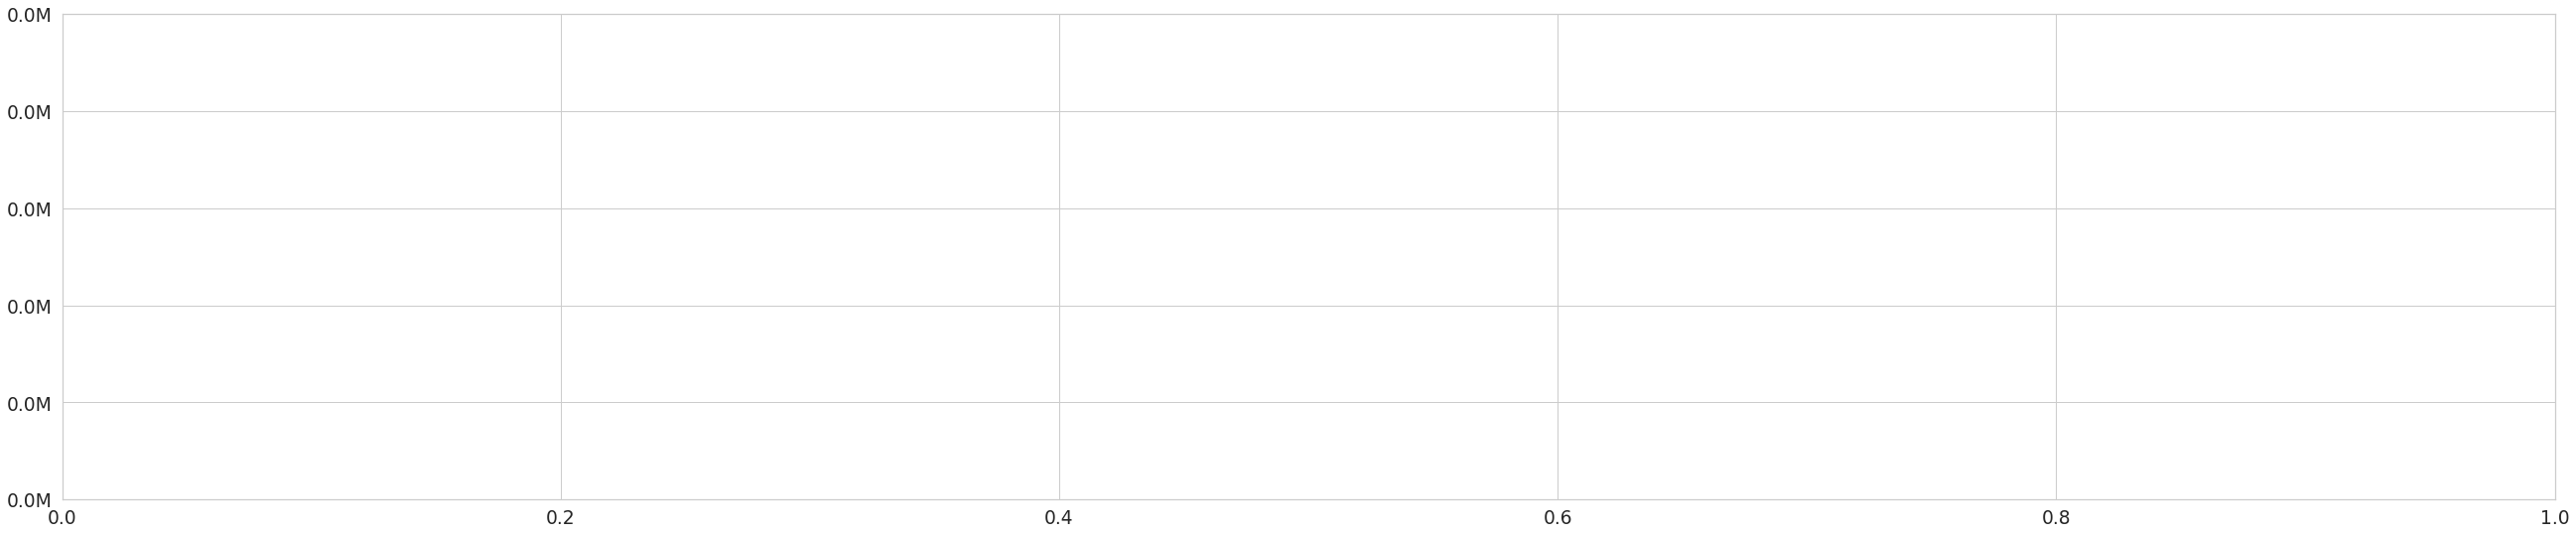

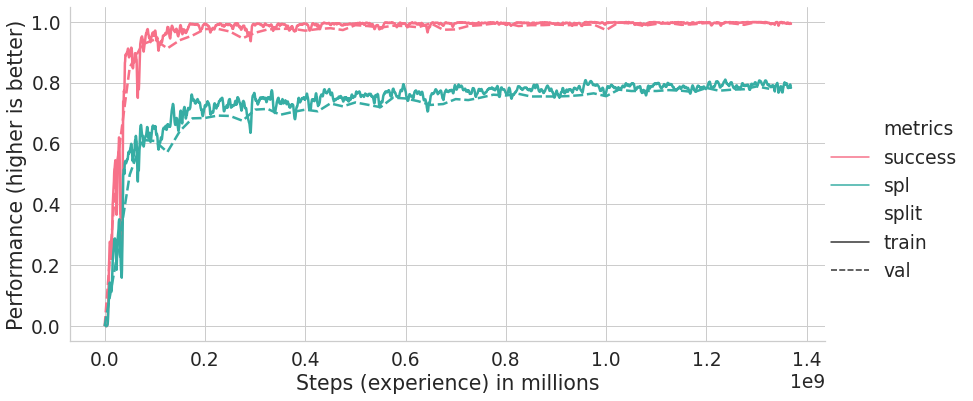

In [54]:
stats = pd.DataFrame()
# train_log = "/checkpoint/maksymets/logs/habitat_baselines/ddppo/pointgoal_nav/pointnav2021_gt_loc_gibson4_spl_rew2021_11_12_17_34_23/log.err"
# val_log = "/checkpoint/maksymets/logs/habitat_baselines/ddppo/pointgoal_nav/pointnav2021_gt_loc_gibson4_spl_rew2021_11_12_17_34_23/log_eval.err"

train_log = "/checkpoint/maksymets/logs/habitat_baselines/ddppo/pointgoal_nav/pointnav2021_gt_loc_gibson0_spl_rew2021_11_12_17_29_15/log.err"
val_log = "/checkpoint/maksymets/logs/habitat_baselines/ddppo/pointgoal_nav/pointnav2021_gt_loc_gibson0_spl_rew2021_11_12_17_29_15/log_eval.err"


import re
pattern  = 'Average window size: 50 .*' #    spl: (\d+\.\d+)
pattern_frames  = 'frames: \d+\.?\d*' #    spl: (\d+\.\d+)
new_file = []

# Make sure file gets closed after being iterated
with open(train_log, 'r') as f:
   # Read the file contents and generate a list with each line
   lines = f.readlines()



# Iterate each line
for line in lines:

    # Regex applied to each line 
    match = re.search(pattern_frames, line)
    if match:
        # Make sure to add \n to display correctly when we write it back
        new_line = match.group() + '\n'        
        step_id = float(new_line.split(": ")[1])

    match = re.search(pattern, line)
    if match:
        # Make sure to add \n to display correctly when we write it back
        new_line = match.group() + '\n'
        new_line = new_line.split("  ") # "train_" + 
        metrics = {"train_" + pair[0]: float(pair[1]) for pair in map(lambda x: x.split(": "), new_line)}
#        pairs = zip(new_line[::2], new_line[1::2])
        #print(metrics)
#         new_file.append(new_line)
        metrics["step_id"] = step_id
        metrics["split"] = "train"
        #print(metrics)
        stats = stats.append(pd.DataFrame(metrics, index=["step_id"]))
        

        
ckpt_pattern = "=======current_ckpt: .*ckpt.(\d+).pth" #"=======current_ckpt: data/new_checkpoints/pointnav2021_gt_loc_gibson4_spl_rew2021_11_12_17_34_23/ckpt.0.pth======="        
metrics_pattern = "Average episode (.*): (\d+\.?\d*)"# Average episode spl: 0.0000

# Make sure file gets closed after being iterated
with open(val_log, 'r') as f:
   # Read the file contents and generate a list with each line
   lines = f.readlines()



step_id = -1
# Iterate each line
for line in lines:
    # Regex applied to each line 
    match = re.search(ckpt_pattern, line)
    if match:
        # Make sure to add \n to display correctly when we write it back
        ckpt_id = match.group(1)
#         print(f"ckpt {ckpt_id}")
        ckpt_id = float(ckpt_id)
        #step_id = float(new_line.split(": ")[1])
        step_id = ckpt_id * 25000000
        stats = stats.append(pd.DataFrame({"step_id": step_id, "split": "val"}, index=["step_id"]))   

    match = re.search(metrics_pattern, line)
    if match:
        # Make sure to add \n to display correctly when we write it back
        metrics_name = match.group(1)
        metrics_value = float(match.group(2))
#         print(f"{metrics_name}: {metrics_value}")
#         metrics = {}
#         metrics[metrics_name] = metrics_value
#         new_line = match.group() + '\n'
#         new_line = new_line.split("  ")
#         metrics = {"train_" + pair[0]: float(pair[1]) for pair in map(lambda x: x.split(": "), new_line)}
#        pairs = zip(new_line[::2], new_line[1::2])
        #print(metrics)
#         new_file.append(new_line)
#         metrics["step_id"] = ckpt_id * 25000000
#         metrics["split"] = "val"
        # stats[metrics["split"] == "val"][metrics["step_id"] == metrics["step_id"]][metrics_name] = metrics_value
        stats.loc[(stats.step_id == step_id), metrics_name] = metrics_value
        #print(metrics)
        #stats = stats.append(pd.DataFrame(metrics, index=["step_id"]))        
        


print(stats)
# print("step_id:", x[:20], "train_spl:", y[:20])
# sns.lineplot(x, y)

#     plot_column(stats, "distance_to_goal")
# df = stats
df = stats.melt('step_id', var_name='cols', value_name='vals')
# plot_column(stats, "train_spl")
# print(df)
df = df[df["cols"].isin(["spl", "success", "train_spl", "train_success"])]
df["vals"] = pd.to_numeric(df["vals"])
df["split"] = "val"
df.loc[df.cols.isin(["train_spl", "train_success"]), "split"] = "train"
# df[df["cols"] == "train_spl"]["cols"] = "spl"
df.loc[(df.cols == 'train_spl'),'cols']='spl'
# df[df["cols"] == "train_success", "cols"] = "success"
df.loc[(df.cols == 'train_success'),'cols']='success'
# print(df[df["cols"] == "train_success"]["cols"])


df = df.rename(columns={"cols": "metrics"})

from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)


formatter = FuncFormatter(millions)

sns.set(font_scale=1.7)
sns.set_style("whitegrid")


f, ax = plt.subplots(figsize=(45, 9))
ax.yaxis.set_major_formatter(formatter)
# main_metric = "d_min"
# ax.set_title(main_metric)

# plt.xlim(0, 100*10**6) #0.8*10**9)
# ax = plt.gca()
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles[1:], labels[1:])
#    ax.ticklabel_format(style='plain')
# plt.figure(figsize=(50, 5))
#print(df)
plot = sns.relplot(data=df, x="step_id", hue="metrics", y="vals", kind="line", style="split", linewidth=2.5, ax=ax,
           style_order=["train", "val"], #"val"
            hue_order=["success", "spl"],
            height=6, aspect=2,
            palette=sns.color_palette("husl", 2)
           )   
plot.set_axis_labels("Steps (experience) in millions", "Performance (higher is better)").set_titles("").tight_layout(w_pad=0)
plot.fig.get_axes()[0].xaxis.set_major_formatter(formatter)
# title
# plot._legend.set_title("metrics")

# sns.relplot(x="timepoint", y="signal", hue="region", style="event",
#             kind="line", data=fmri);
plt.show()
#plot.savefig("/private/home/maksymets/habitat-api-pr/experiments/rgbd_semseg_overfit.svg", format="svg")
